In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam

In [9]:
(X_train, _), (_, _) = mnist.load_data()

In [10]:
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

In [11]:
def build_generator(latent_dim):
    model = Sequential([
        Dense(7*7*128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Reshape((7, 7, 128)),
        Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh')
    ])
    return model

In [12]:
def build_discriminator():
    model = Sequential([
        Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(28, 28, 1)),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Conv2D(128, kernel_size=3, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

In [13]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

In [14]:
latent_dim = 100
generator = build_generator(latent_dim)
z = Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [15]:
epochs = 20000
batch_size = 128
sample_interval = 1000

4/4 [==============================] - 0s 21ms/step
Epoch 0, [D loss: 0.7020518481731415, acc.: 38.28125], [G loss: 0.6927531957626343]
1/1 [==============================] - 0s 54ms/step


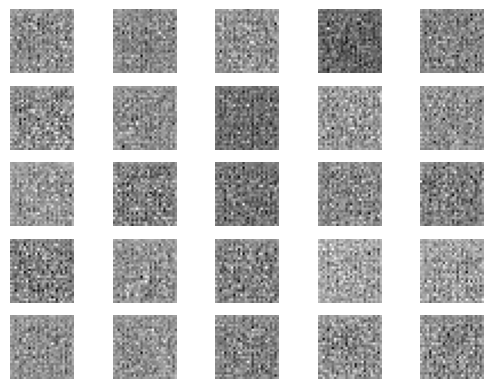

4/4 [==============================] - 0s 8ms/step
Epoch 100, [D loss: 0.33552878350019455, acc.: 96.875], [G loss: 1.250607967376709]
4/4 [==============================] - 0s 13ms/step
Epoch 200, [D loss: 0.6268396973609924, acc.: 62.5], [G loss: 1.0140526294708252]
4/4 [==============================] - 0s 8ms/step
Epoch 300, [D loss: 0.4211663603782654, acc.: 86.328125], [G loss: 1.3870208263397217]
4/4 [==============================] - 0s 11ms/step
Epoch 400, [D loss: 0.7020132541656494, acc.: 55.46875], [G loss: 0.8516162633895874]
4/4 [==============================] - 0s 9ms/step
Epoch 500, [D loss: 0.6834520697593689, acc.: 58.984375], [G loss: 0.8453080654144287]
4/4 [==============================] - 0s 7ms/step
Epoch 600, [D loss: 0.6755033731460571, acc.: 59.765625], [G loss: 0.86830735206604]
4/4 [==============================] - 0s 13ms/step
Epoch 700, [D loss: 0.6561996936798096, acc.: 56.640625], [G loss: 0.8950331211090088]
4/4 [==============================] - 0s 

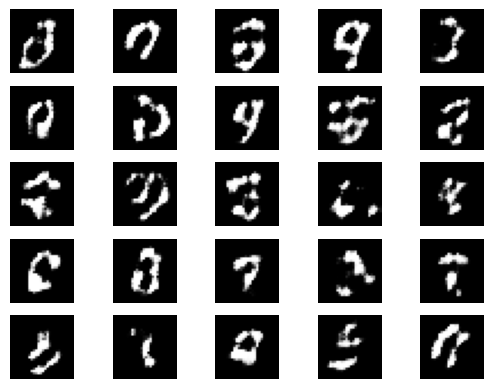

4/4 [==============================] - 0s 9ms/step
Epoch 1100, [D loss: 0.7118274867534637, acc.: 51.5625], [G loss: 0.7851135730743408]
4/4 [==============================] - 0s 9ms/step
Epoch 1200, [D loss: 0.6822209358215332, acc.: 55.078125], [G loss: 0.7586466073989868]
4/4 [==============================] - 0s 8ms/step
Epoch 1300, [D loss: 0.6686230301856995, acc.: 59.765625], [G loss: 0.7796294689178467]
4/4 [==============================] - 0s 6ms/step
Epoch 1400, [D loss: 0.8032792508602142, acc.: 34.765625], [G loss: 0.6590745449066162]
4/4 [==============================] - 0s 11ms/step
Epoch 1500, [D loss: 0.676252007484436, acc.: 58.203125], [G loss: 0.7613521814346313]
4/4 [==============================] - 0s 8ms/step
Epoch 1600, [D loss: 0.6783677339553833, acc.: 57.8125], [G loss: 0.7613602876663208]
4/4 [==============================] - 0s 7ms/step
Epoch 1700, [D loss: 0.6790067851543427, acc.: 54.296875], [G loss: 0.7292889356613159]
4/4 [==========================

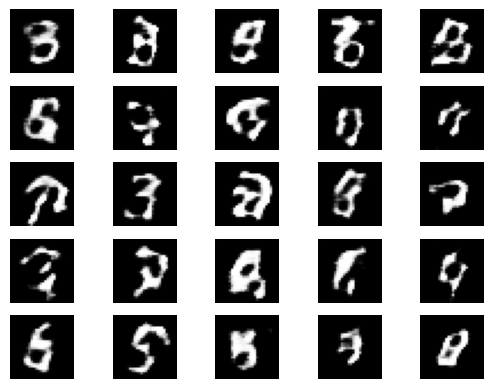

4/4 [==============================] - 0s 9ms/step
Epoch 2100, [D loss: 0.6790905892848969, acc.: 57.8125], [G loss: 0.7537045478820801]
4/4 [==============================] - 0s 9ms/step
Epoch 2200, [D loss: 0.6335024237632751, acc.: 68.359375], [G loss: 0.8454233407974243]
4/4 [==============================] - 0s 8ms/step
Epoch 2300, [D loss: 0.682570606470108, acc.: 58.203125], [G loss: 0.7277626395225525]
4/4 [==============================] - 0s 8ms/step
Epoch 2400, [D loss: 0.6963276863098145, acc.: 51.953125], [G loss: 0.7412886619567871]
4/4 [==============================] - 0s 10ms/step
Epoch 2500, [D loss: 0.6752579808235168, acc.: 58.984375], [G loss: 0.7549606561660767]
4/4 [==============================] - 0s 9ms/step
Epoch 2600, [D loss: 0.6741512715816498, acc.: 54.6875], [G loss: 0.7514586448669434]
4/4 [==============================] - 0s 9ms/step
Epoch 2700, [D loss: 0.6742830872535706, acc.: 56.640625], [G loss: 0.7662277817726135]
4/4 [==========================

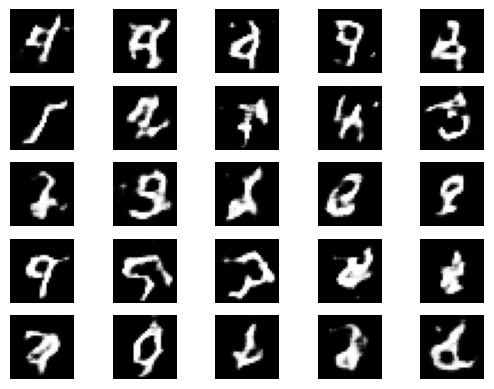

4/4 [==============================] - 0s 17ms/step
Epoch 3100, [D loss: 0.6868161559104919, acc.: 54.6875], [G loss: 0.7366210222244263]
4/4 [==============================] - 0s 11ms/step
Epoch 3200, [D loss: 0.6907342076301575, acc.: 50.390625], [G loss: 0.7541725635528564]
4/4 [==============================] - 0s 9ms/step
Epoch 3300, [D loss: 0.6808584928512573, acc.: 55.46875], [G loss: 0.7299660444259644]
4/4 [==============================] - 0s 10ms/step
Epoch 3400, [D loss: 0.69441357254982, acc.: 50.390625], [G loss: 0.7582110166549683]
4/4 [==============================] - 0s 8ms/step
Epoch 3500, [D loss: 0.6958351731300354, acc.: 51.171875], [G loss: 0.7346966862678528]
4/4 [==============================] - 0s 9ms/step
Epoch 3600, [D loss: 0.6909091770648956, acc.: 53.515625], [G loss: 0.7486913800239563]
4/4 [==============================] - 0s 9ms/step
Epoch 3700, [D loss: 0.7004357576370239, acc.: 48.828125], [G loss: 0.7271353006362915]
4/4 [========================

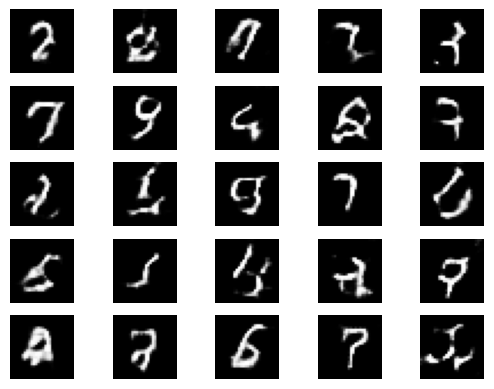

4/4 [==============================] - 0s 8ms/step
Epoch 4100, [D loss: 0.717818558216095, acc.: 44.140625], [G loss: 0.7176104784011841]
4/4 [==============================] - 0s 8ms/step
Epoch 4200, [D loss: 0.7000198364257812, acc.: 50.78125], [G loss: 0.7452741265296936]
4/4 [==============================] - 0s 7ms/step
Epoch 4300, [D loss: 0.6753847002983093, acc.: 58.203125], [G loss: 0.7893959879875183]
4/4 [==============================] - 0s 16ms/step


In [ ]:
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]

   
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

   
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.array([1] * batch_size)

   
    g_loss = combined.train_on_batch(noise, valid_y)

   
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}], [G loss: {g_loss}]")

   
    if epoch % sample_interval == 0:
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, latent_dim))
        gen_imgs = generator.predict(noise) * 0.5 + 0.5  # Rescale images 0 - 1

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()